In [160]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

Re = np.real
Im = np.imag

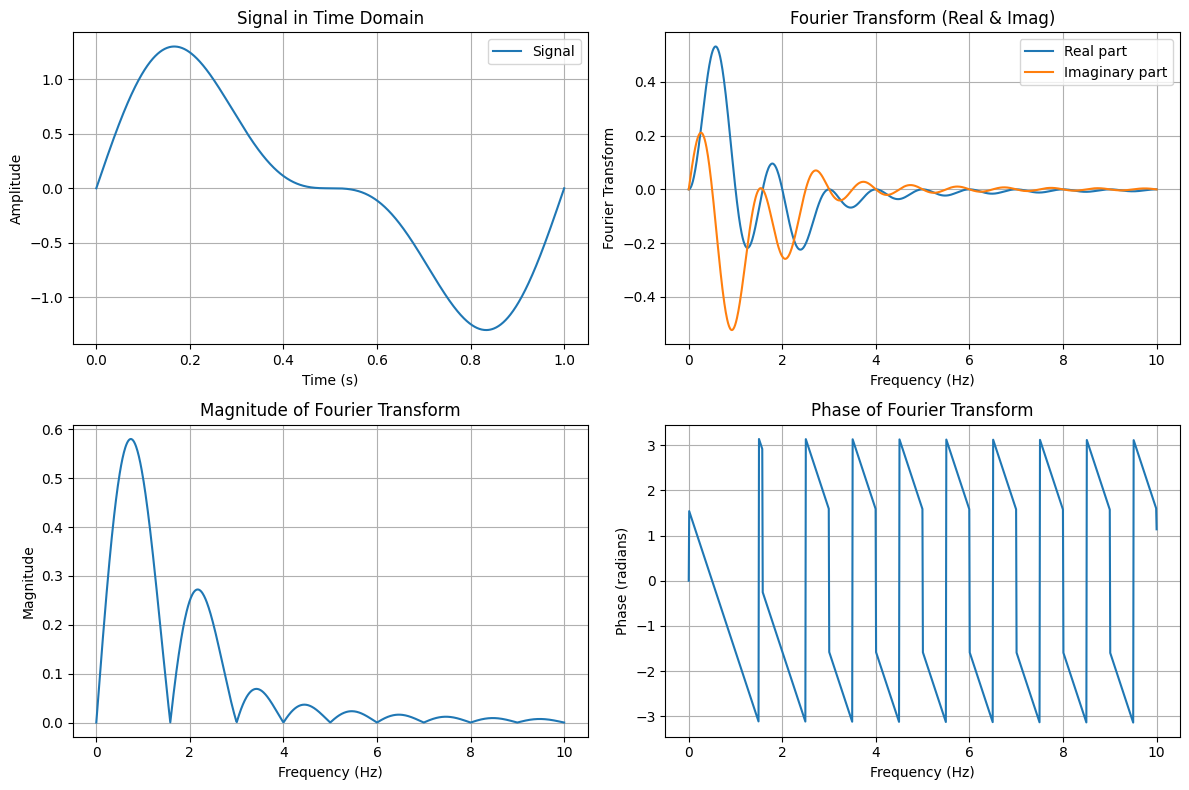

In [205]:
n = 1000
T = 1
t = np.linspace(0, T, n)

y = np.sin(2 * np.pi * t / T) + 0.5 * np.sin(4 * np.pi * t / T)

def fourier_transform(f, t, freq):
    return np.trapezoid(f * np.exp(-1j * 2 * np.pi * freq * t), t)

# Fourier transform is symmetric for real signals
freqs = np.linspace(0, 10, 1000)

F = np.array([fourier_transform(y, t, f) for f in freqs])

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Time domain signal
axs[0, 0].plot(t, y, label='Signal')
axs[0, 0].set_xlabel('Time (s)')
axs[0, 0].set_ylabel('Amplitude')
axs[0, 0].set_title('Signal in Time Domain')
axs[0, 0].legend()
axs[0, 0].grid()

# Real and Imaginary parts
axs[0, 1].plot(freqs, Re(F), label='Real part')
axs[0, 1].plot(freqs, Im(F), label='Imaginary part')
axs[0, 1].set_xlabel('Frequency (Hz)')
axs[0, 1].set_ylabel('Fourier Transform')
axs[0, 1].set_title('Fourier Transform (Real & Imag)')
axs[0, 1].legend()
axs[0, 1].grid()

# Magnitude
axs[1, 0].plot(freqs, np.abs(F), label='Magnitude')
axs[1, 0].set_title('Magnitude of Fourier Transform')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Magnitude')
axs[1, 0].grid()

# Phase
axs[1, 1].plot(freqs, np.angle(F), label='Phase')
axs[1, 1].set_title('Phase of Fourier Transform')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Phase (radians)')
axs[1, 1].grid()

plt.tight_layout()
plt.show()

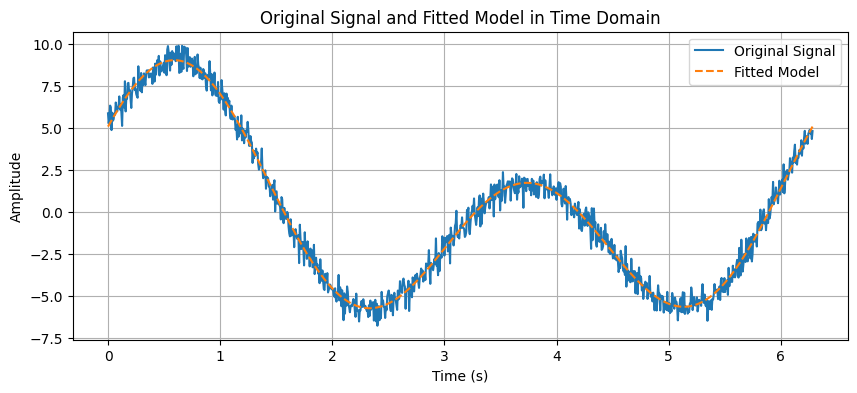

In [227]:
n = 1000
T = 2 * np.pi
t = np.linspace(0, T, n)

y = 3 * np.cos(t) + 2 * np.sin(t) + 2 * np.cos(2 * t) + 5 * np.sin(2 * t)

# Add noise to the signal
np.random.seed(0)
noise = np.random.normal(0, 0.5, n)
y += noise

# Fit a cos(t) + b sin(t) model
def model(t, a, b, c, d):
    return a * np.cos(t) + b * np.sin(t) + c * np.cos(2 * t) + d * np.sin(2 * t)

from scipy.optimize import curve_fit
params, _ = curve_fit(model, t, y, p0=np.random.rand(4))

# Extracting parameters
a, b, c, d = params

# Plotting the original signal and the fitted model
plt.figure(figsize=(10, 4))
plt.plot(t, y, label='Original Signal')
plt.plot(t, model(t, a, b, c, d), '--', label='Fitted Model')
plt.title('Original Signal and Fitted Model in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()